In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('people.csv')

# **EDA**

In [4]:
data


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [5]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **NO of People had conflict with other people in Organization**


Had a conflict  :    2169

In [7]:
data['workAccident'].value_counts()

workAccident
0    12830
1     2169
Name: count, dtype: int64

# **People got Promotions in 5 Year**


Got Promotion :   319

In [8]:
data['promotionInLast5years'].value_counts()

promotionInLast5years
0    14680
1      319
Name: count, dtype: int64

# **Data Cleansing**


*   checking for Null
*   Checking for Duplicates
*   checking for Outliers








In [9]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
data.duplicated().sum()

3008

In [14]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

In [11]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

# **Searching for Outliers**

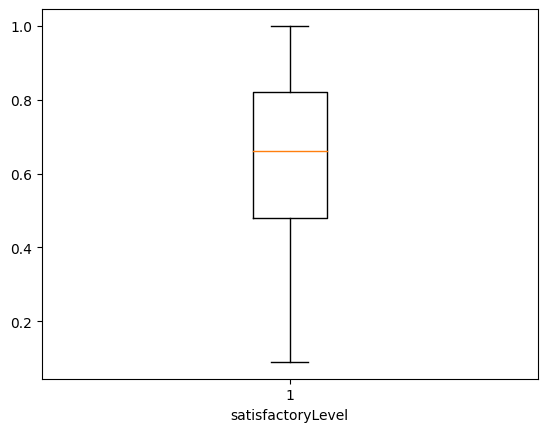

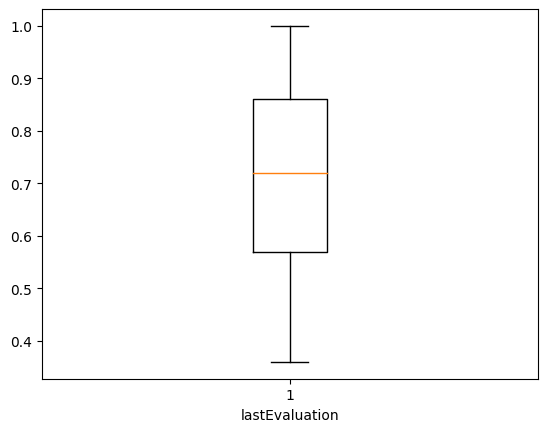

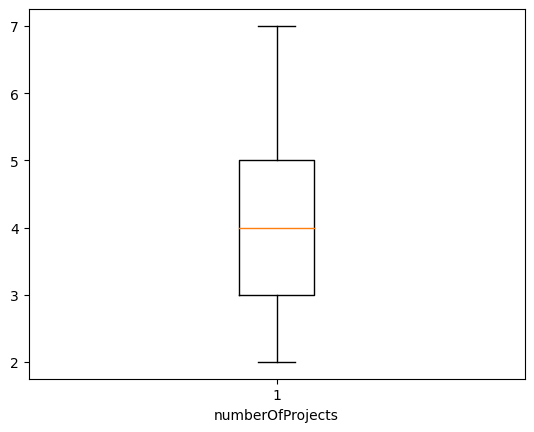

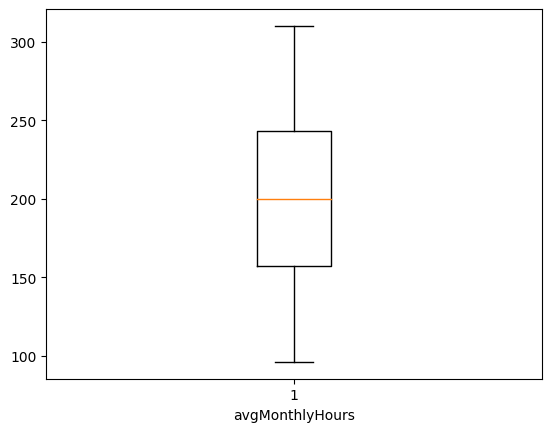

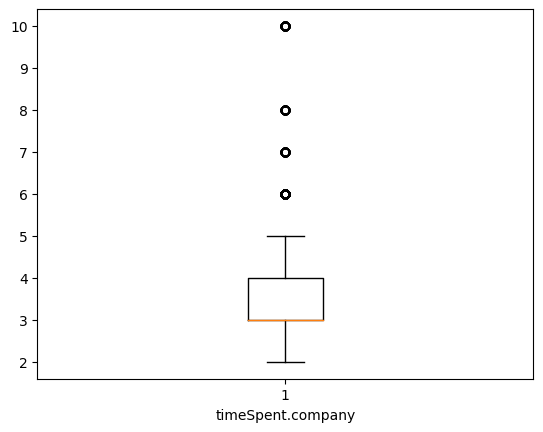

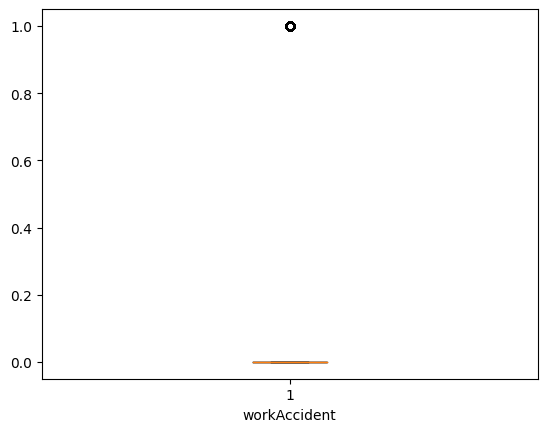

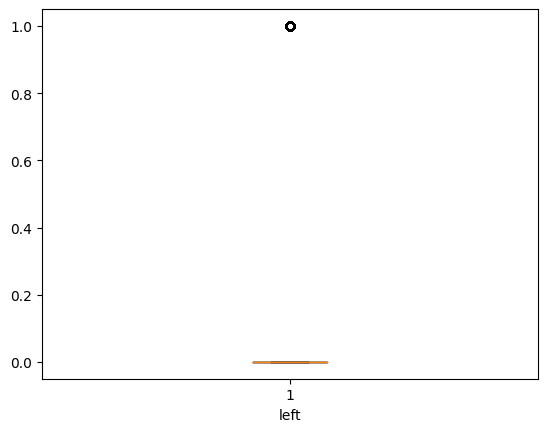

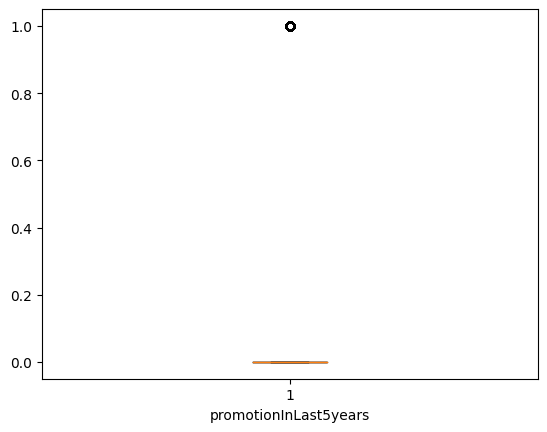

In [25]:
for col in data.columns:
  if data[col].dtypes != "object":
    plt.boxplot(data[col])
    plt.xlabel(col)
    plt.show()

In [26]:
data['numberOfProjects'].value_counts()

numberOfProjects
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [30]:
data['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='numberOfProjects', ylabel='count'>

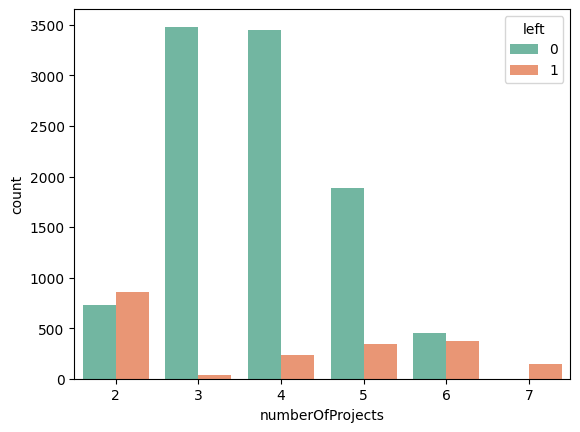

In [29]:
sns.countplot(data=data,x ='numberOfProjects',palette='Set2',hue ='left')

People with 7 projects are leaving the company !!!!!



People with 2 project are leaving due to less work

In [31]:
data['workAccident'].value_counts()

workAccident
0    10141
1     1850
Name: count, dtype: int64

<Axes: xlabel='workAccident', ylabel='count'>

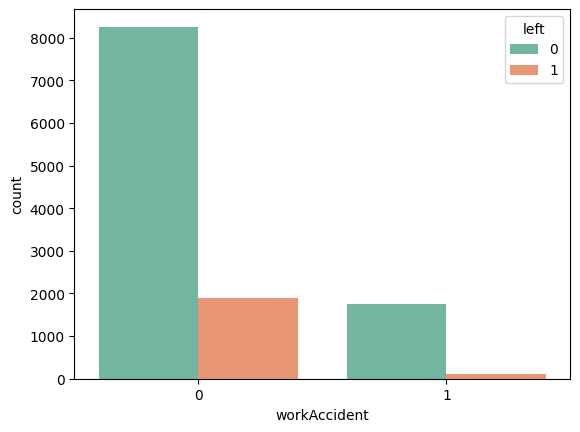

In [38]:
sns.countplot(data = data, x = 'workAccident',palette='Set2',hue='left')

<Axes: xlabel='workAccident', ylabel='count'>

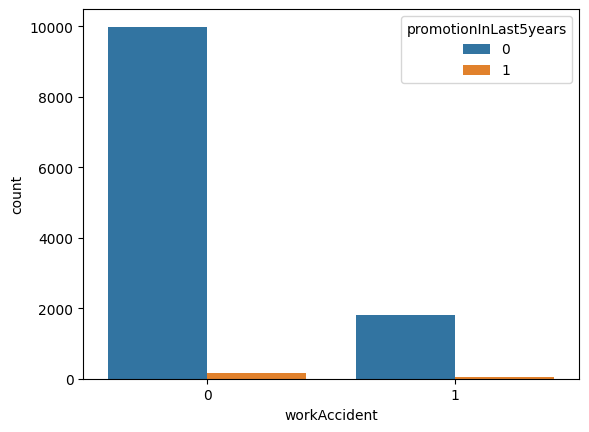

In [39]:
sns.countplot(data = data, x = 'workAccident', hue = 'promotionInLast5years')

In [43]:
# Drop non-numeric columns before computing correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation
correlation_matrix = numeric_data.corr()


In [44]:
correlation_matrix

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

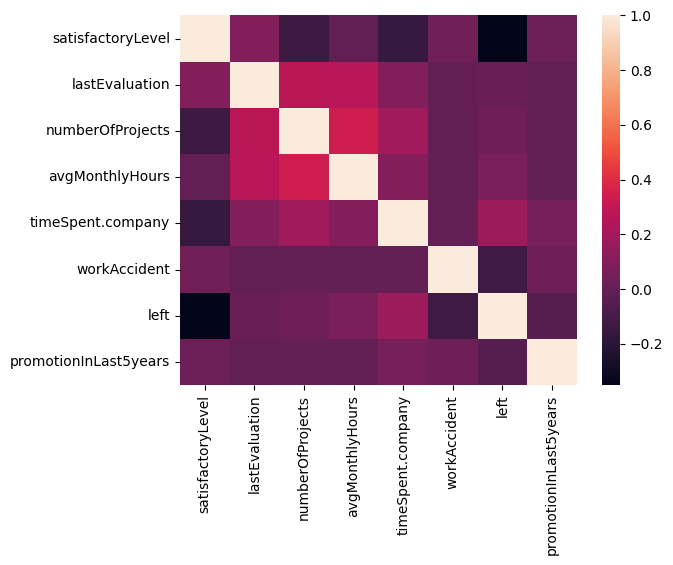

In [45]:
sns.heatmap(data = correlation_matrix,annot=None )

<Axes: xlabel='left', ylabel='count'>

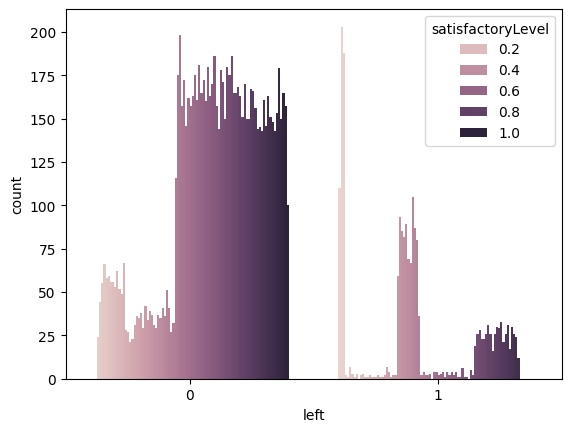

In [49]:
sns.countplot(data = data, x ='left',hue='satisfactoryLevel')

People with not satisfied left company

<Axes: xlabel='left', ylabel='count'>

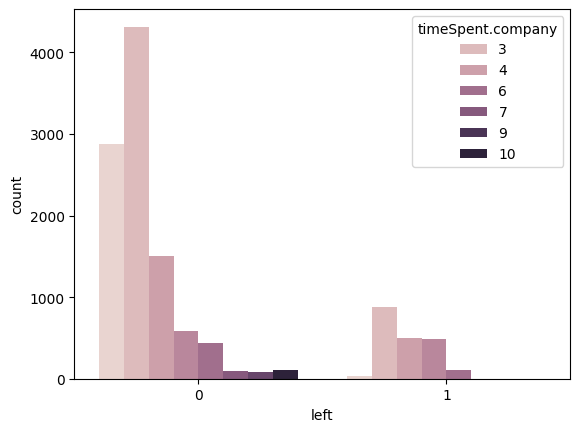

In [50]:
sns.countplot(data=data,x='left',hue='timeSpent.company')

Avg time spent in the company by employee is 3 to 4 year.

In [51]:
data['timeSpent.company'].mean()

3.3648569760653824

<Axes: xlabel='left', ylabel='count'>

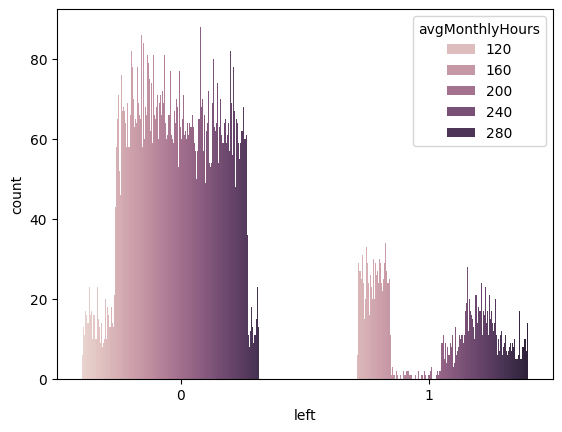

In [52]:
sns.countplot(data=data,x = 'left',hue='avgMonthlyHours')